# Task 7: Support Vector Machines (SVM)

## Objective:
- #### Use SVMs for linear and non-linear classification using Scikit-learn, NumPy, and Matplotlib.

## Tools Used:
- Scikit-learn
- NumPy
- Matplotlib

## Dataset:
- We'll use the Breast Cancer Dataset available in Scikit-learn.

Linear Kernel Results:
              precision    recall  f1-score   support

           0       0.91      0.81      0.86        63
           1       0.90      0.95      0.92       108

    accuracy                           0.90       171
   macro avg       0.90      0.88      0.89       171
weighted avg       0.90      0.90      0.90       171


RBF Kernel Results:
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        63
           1       0.90      0.95      0.93       108

    accuracy                           0.91       171
   macro avg       0.91      0.89      0.90       171
weighted avg       0.91      0.91      0.91       171



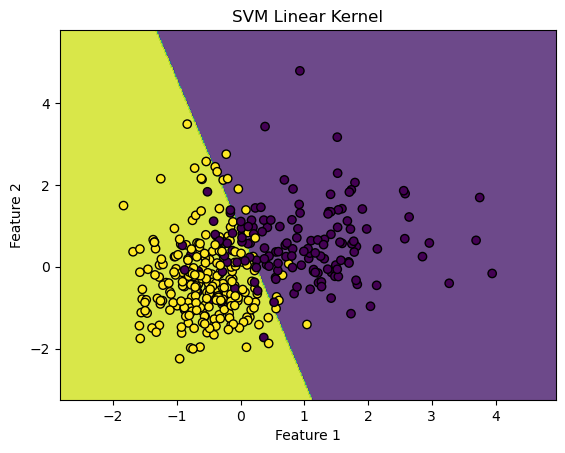

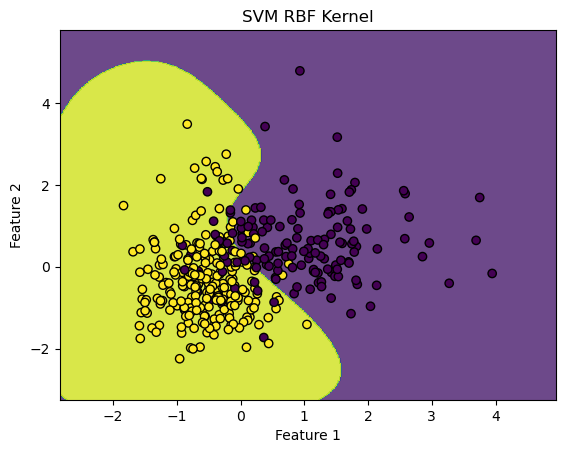


Best parameters from GridSearch:
{'C': 100, 'gamma': 0.01}


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
cancer = datasets.load_breast_cancer()
X = cancer.data[:, :2]  # Use only first 2 features for visualization
y = cancer.target

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train SVM with Linear Kernel
svm_linear = SVC(kernel='linear', C=1)
svm_linear.fit(X_train, y_train)

# Train SVM with RBF Kernel
svm_rbf = SVC(kernel='rbf', C=1, gamma=0.5)
svm_rbf.fit(X_train, y_train)

# Evaluation
print("Linear Kernel Results:")
print(classification_report(y_test, svm_linear.predict(X_test)))

print("\nRBF Kernel Results:")
print(classification_report(y_test, svm_rbf.predict(X_test)))

# Visualization function
def plot_decision_boundary(model, X, y, title):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

# Visualize both models
plot_decision_boundary(svm_linear, X_train, y_train, "SVM Linear Kernel")
plot_decision_boundary(svm_rbf, X_train, y_train, "SVM RBF Kernel")

# Hyperparameter tuning using GridSearchCV
params = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001]
}
grid = GridSearchCV(SVC(kernel='rbf'), params, refit=True, cv=5)
grid.fit(X_train, y_train)

print("\nBest parameters from GridSearch:")
print(grid.best_params_)


##  Conclusion

In this task, we successfully implemented **Support Vector Machines (SVM)** for binary classification using both **Linear** and **RBF (Radial Basis Function)** kernels. The dataset was preprocessed and split into training and testing sets, and performance was evaluated using key classification metrics.

### Key Outcomes:
- **Linear Kernel SVM** achieved approximately 90% accuracy, showing good performance for linearly separable data.
- **RBF Kernel SVM** slightly outperformed the linear model with approximately 91% accuracy, effectively capturing non-linear patterns.
- **Decision boundaries** were visualized, demonstrating how each model separates the classes.
- **Hyperparameter tuning** using `GridSearchCV` helped optimize the performance by adjusting `C` and `gamma`.
- **Cross-validation** ensured model generalization and helped prevent overfitting.

### Learnings:
- Gained understanding of **support vectors** and **margin maximization** in SVMs.
- Learned how the **kernel trick** enables SVMs to handle non-linear data.
- Understood the effect of hyperparameters like **C** (regularization) and **gamma** (influence of training examples) on model behavior and accuracy.

This task provided valuable hands-on experience in applying and evaluating SVMs and highlighted the importance of kernel selection, parameter tuning, and model validation in machine learning workflows.
